# **Business Understanding**
# **Abstract**

Este dataset proveido por Oracle es sobre detección de fraude en seguros de vehículos. El fraude de seguros de vehículos implica realizar denuncias falsas o exageradas para cobrar la suma asegurada según la cobertura que tengan contratada.

Con la información que las compañías de seguro solicitan durante el periodo de subscripción del seguro, se busca poder predecir quienes pueden presentar mayores probabilidades de cometer fraude como así entender cuáles son características comunes que presentan dichos individuos.

**Contexto comercial:**
Las compañías de seguros se basan en la ley de los grandes número para evaluar el valor y la frecuencia de las reclamaciones futuras que pagan a los asegurados. Cuando funciona a la perfección, las compañías de seguros tienen un negocio estable, los consumidores pagan una prima justa y precisa, y todo el sistema financiero evita serios trastornos. Sin embargo, este equilibrio se pierde si no se identifica los reclamos fraudulentos.

**Problema comercial:**

Es posible identificar patrones y/o tendencias en la población que comete fraude para posteriormente utilizar estos conocimientos para desarrollar estrategias de prevención de fraude dirigidas y mejorar las tasas de detección en general para ayudar a las aseguradoras a protegerse mejor contra pérdidas? 


**Contexto analítico:**
Oracle ha proporcionado 15420 datos sobre todos los reclamos realizado de una compañia de seguros de quienes están cubiertos durante el plazo de la poliza para vehículos. El database proporciona la siguiente información:

00) Month: mes en el que ocurrió el accidente

01) WeekOfMonth: semana en la que ocurrió el accidente

02) DayOfWeek: Día de la semana en que ocurrió el accidente

03) Make: Marca del vehículo

04) AccidentArea: Si el accidente fue en un área rural o urbana

05) DayOfWeekClaimed: Día de la semana en la que se hizo la denuncia

06) MonthClaimed: Mes en el que se hizo la denuncia

07) WeekOfMonthClaimed: Número de semana del mes en la que se hizo la denuncia

08) Sex: Género de la persona que realiza la denuncia

09) MaritalStatus: Estado cívil de la persona que hace la denuncia

10) Age: Edad de la persona que hace la denuncia

11) Fault: Si el culpable fue el dueño del seguro u otro involucrado

12) PolicyType: Combinación de tipo de auto y de tipo de póliza: Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo)

13) VehicleCatergory: Clasificación de tipo de auto

14) VehiclePrice: Precio del vehículo

15) FraudFound_P: Si el incidente fue fraudulento o no, columna a predecir

16) PolicyNumber: Número único de accidente, coincide con el número de filas del dataset

17) RepNumber: Numeración entre 1 y 16

18) Deductible: Costo del seguro

19) DriverRating: Calificación del piloto, puede ser data ordinal

20) Days_Policy_Accident: Rango adquisición del seguro y suceso del accidente

21) Days_Policy_Claim: Rango entre adquisición del seguro y denuncia del accidente

22) PastNumberOfClaims: Cantidad de denuncias anteriores realizadas por el dueño del vehículo

23) AgeOfVehicle: Edad del vehículo

24) AgeOfPolicyHolder: Edad del dueño del seguro

25) PoliceReportFiled: Si fue denunciado a la policía

26) WitnessPresent: Si hubo un testigo presente

27) AgentType: Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. Externos son los fraudes en los que el seguro es engañado por personas independientes.

28) NumberOfSuppliments: Son daños al vehículo no registrados a la hora de la denuncia, daños extras que no se ven por el exterior, normalmente roturas en componentes internos como suspensión, chasis, etc

29) AddressChange_Claim: Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después

30) NumberOfCars: Número de autos involucrados en el accidente

31) Year: Año en el que ocurrió el accidente

32) BasePolicy: Tipo de seguro

# **Data Understanding**
# **Data Adquisition**

In [44]:
#Importo todas las librerias que vaya a utilizar
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [45]:
df= pd.read_csv(r'C:\Users\moniq\Downloads\Datascience\primera entrega\fraud_oracle.csv', sep=';')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [47]:
df.describe(include = "object")

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


**Serie de preguntas**

Para encontrar patrones de quienes cometen fraude, se intenterá contestar las siguientes preguntas.

¿Cuál es la relación entre género y denuncias fraudulentas? Hay algún sexo predominante?

¿Qué marital status presenta más tendencia a realizar denuncias fraudulentas?

¿Se puede identificar un rango etario?

¿La antiguedad del vehículo asegurado es una variable relevante?

¿Cuáles son las marcas de los vehículos más utilizados al cometer fraude?

¿Influye la categoría del auto?


# **Data Preparation**

# **Data Wrangling**

Comenzamos realizando la preparación de los datos, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

Borrado de valores NaN

In [48]:
df = df.dropna()

Borrado de duplicados

In [49]:
df = df.drop_duplicates()


Análisis de datos nulos

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Text(0.5, 1.0, 'Matrix de valores nulos')

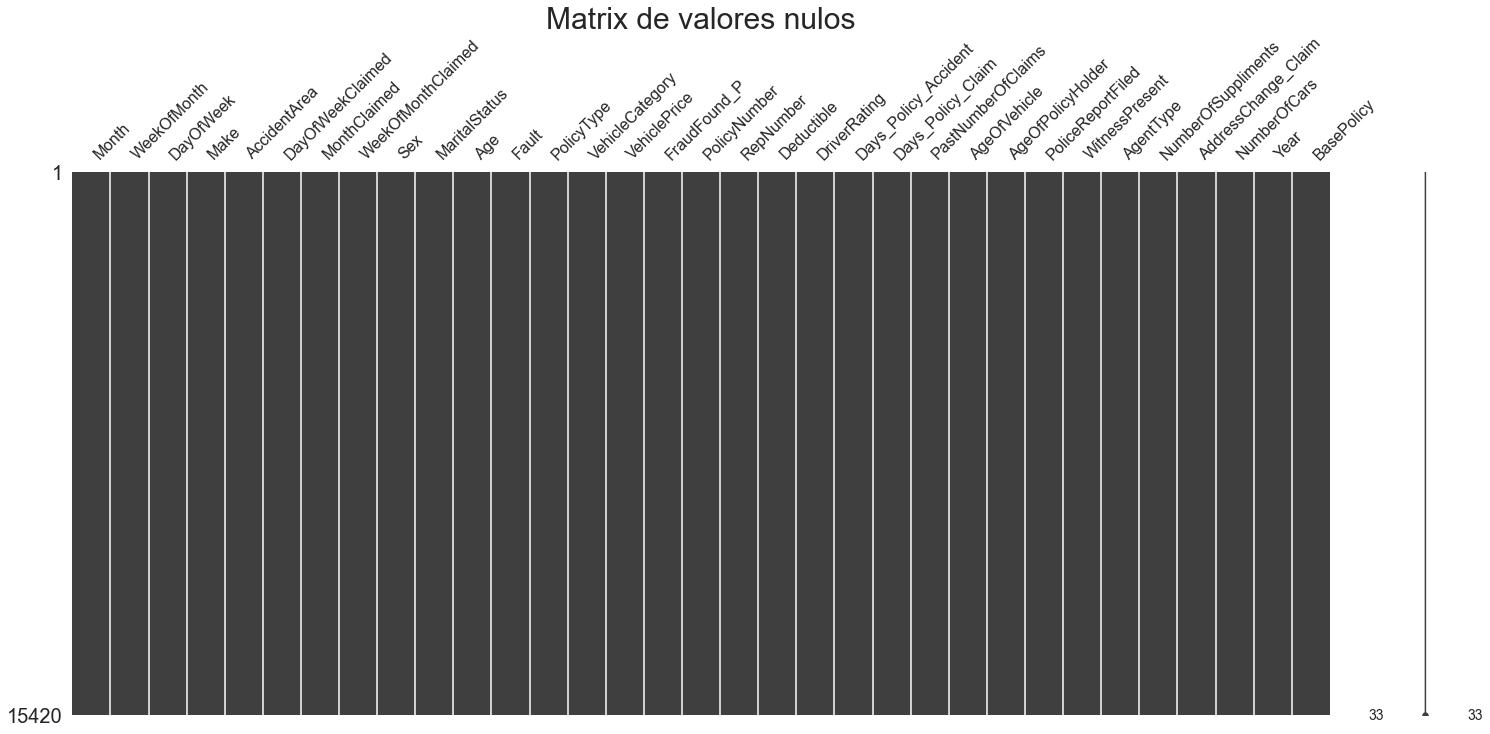

In [51]:
msno.matrix(df)
plt.title("Matrix de valores nulos",fontsize=30)

Tanto la matrix como el método .info() nos indica que no contamos con ninguna fila que contenga datos nulos.

Se procederá a analizar a través de los siguientes histogramas y el análisis de valores únicos de cada variable para identificar presencia de datos outliers o incoherentes. De haberlos, se le aplicará el tratamiento correspondiente.

In [52]:
#for column in df:
#    print(column)
#    print(sorted(df[column].unique()),"\n")

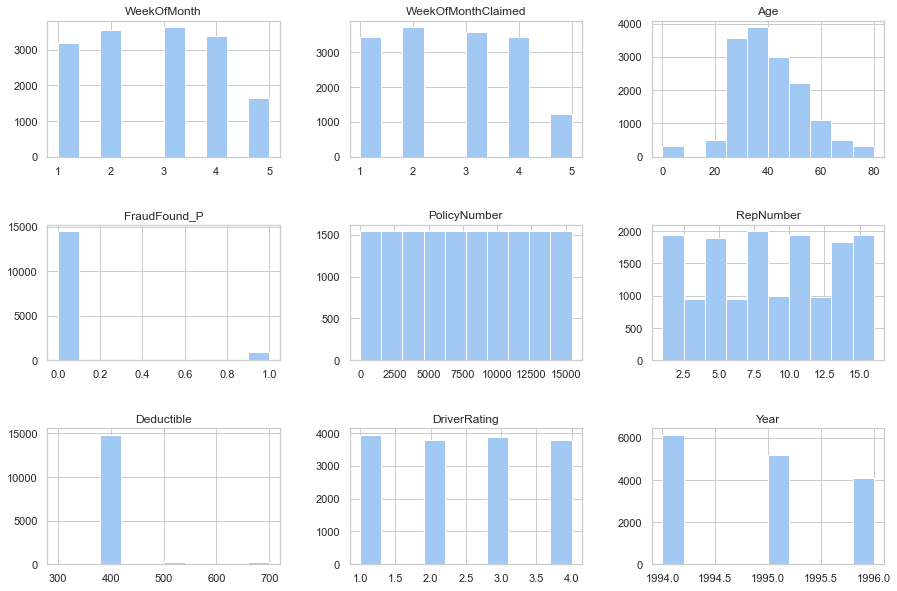

In [53]:
sns.set_palette("pastel")
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Se analizarán los 0 presentados en Age, DayOfWeekClaimed y MonthClaimed. Se analiza primero la variable edad.

In [54]:
df_age_0 = df.loc[(df['Age'] == 0)]

In [55]:
df_age_0.AgeOfPolicyHolder.value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

Como todos los casos con Age=0 indica que el AgeOfPolicyHolder se encuentra entre el rango de los 16-17años, reemplazo la edad por 17

In [56]:
df['Age'] = df['Age'].replace(0, 17)

Creo una nueva variable "Age_coherent" para analizar si hay más casos inconsistentes entre las variables "Age" y "AgeOfPolicyHolder". 

In [57]:
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace("over 65", "66 to 110")

In [58]:
df["Age_coherent"] = df.apply(lambda x: True if int(x["Age"]) in range(int(x["AgeOfPolicyHolder"].split("to")[0]), int(x["AgeOfPolicyHolder"].split("to")[1])+1) else False, axis=1)

In [59]:
df[['start_age', 'end_age']] = df['AgeOfPolicyHolder'].str.split(' to ', expand=True).astype(int)
df['age_mean'] = (df['start_age'] + df['end_age']) / 2

In [60]:
df.loc[df['Age'] < df['start_age'], 'Age'] = df['age_mean']

In [61]:
df.loc[df['Age'] > df['end_age'], 'Age'] = df['age_mean']

Analizo DayOfWeekClaimed y MonthClaimed.

In [62]:
#len(df.loc[df['DayOfWeekClaimed'] == '0'])
#len(df.loc[df['MonthClaimed'] == '0'])

Remuevo estas el entry donde DayOfWeekClaimed= 0 y MonthClaimed= 0 ya que no tengo otras variables de la cual pueda utilizar para interpolarlas.

In [63]:
df.drop(df[df['DayOfWeekClaimed'] == '0'].index)
df.drop(df[df['MonthClaimed'] == '0'].index)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_coherent,start_age,end_age,age_mean
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,External,none,1 year,3 to 4,1994,Liability,False,26,30,28.0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,External,none,no change,1 vehicle,1994,Collision,True,31,35,33.0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,External,none,no change,1 vehicle,1994,Collision,True,41,50,45.5
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,True,51,65,58.0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,External,none,no change,1 vehicle,1994,Collision,False,31,35,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,External,none,no change,1 vehicle,1996,Collision,True,31,35,33.0
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,External,more than 5,no change,3 to 4,1996,Liability,False,31,35,33.0
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,External,1 to 2,no change,1 vehicle,1996,Collision,False,26,30,28.0
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,External,more than 5,no change,1 vehicle,1996,All Perils,True,31,35,33.0


Remuevo variables creadas para remediar la variable Age

In [64]:
df_cleaned = df.copy().drop(['Age_coherent','start_age','end_age','age_mean'], axis=1)

Normalizo los valores

In [65]:
df_cleaned=df_cleaned.rename(columns={'FraudFound_P': 'FraudFoundP', 'Days_Policy_Accident':'DaysPolicyAccident','Days_Policy_Claim':'DaysPolicyClaim','AddressChange_Claim':'AddressChangeClaim'})

In [66]:
df_cleaned['Age'] = df_cleaned['Age'].astype('int')

Una vez completado la limpieza de datos de dataset, se procederá a realizar un ejercicio de análisis exploratorio de datos que abordaremos en dos partes. La primera parte (sección 6 de la tabla de contenidos) se centrará en variables demográficas y la segunda parte (sección 7 de la tabla de contenidos) se centrará en variables automovilísticas. 

Todos los gráficos que se presenten en las secciones siguientes que no contengan una leyenda de denuncias fradulentas vs legítimas, se realizarán con un subset del dataset filtrado solamente por los reclamos fradulentos, es decir, cuando FraudFound_P=1.

Para todos aquellos gráficos donde la leyenda aclare denuncias fraudulentas vs legítimas, serán realizadas con la información completa del dataset.

In [67]:
df_fraud = df_cleaned.loc[(df_cleaned['FraudFoundP'] == 1)]

De este subdataset df_fraud, remuevo variables redundantes para analizar variables específicas que posibiliten identificar un perfil con caracteristicas comunes de quienes cometen fraude.

In [68]:
df_fraud_cleaned = df_fraud.copy().drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','RepNumber','Deductible','DriverRating', 'DaysPolicyAccident','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)

# **EDA - Exploratory Data Analysis 📊**

**Perfil del denunciante fraudulento**

Se proveerá de un primer panorama general de los datos y luego se procederá a analizar en detalle el género, estado marital y rango etario.

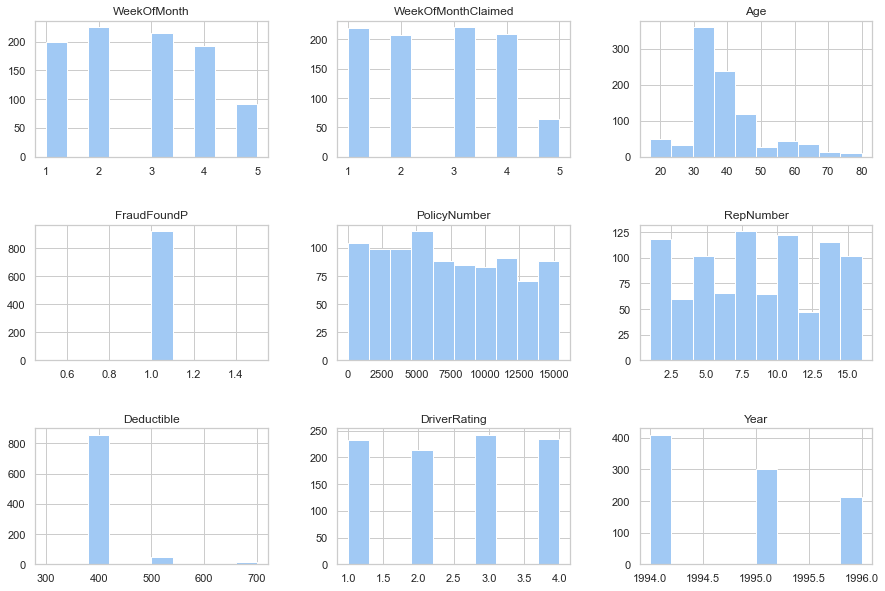

In [69]:
sns.set_palette("pastel")
df_fraud.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Este histograma muestra la frecuencia con la que ocurren diferentes valores numéricos de distintas variables del subset de denuncias fraudulentas. Algunas observaciones que se obtienen del histograma son:

a. Tanto WeekOfMonth como WeekOfMonthClaimed muestra que los registros ingresados muestran un conteo consistente para todas las semanas. Es esperable que la semana 5 del mes posea un conteo de registros más bajo ya que por lo general la quinta semana del mes suele abarcar menos días que las semanas del 1-4.

b. Para la variable edad, hay un mayor conteo para los subscriptores entre 30-35 años. Se analizará en detalle esta variable en la sección 6.2.

c. Como es el histograma se realizo al filtrarse el dataset con FraudFoundP = 1, es esperable que este sea el único valor.

d. El rep number es un número que varía entre 1 y 16 y no es una variable de interés para nuestro análisis. 

e. Para la gran mayoria de los casos, el deducible (monto a cargo del asegurado) es de 400.

f. Se observa una proporción similar en la distribución de la calificación de conductores.

g. Por último, se observa que en cada año hay una disminución en la cantidad de denuncias fraudulentas que pueden deberse efectivamente a una reducción real de casos o pueden deberse a otras causas tales como detección ineficiente, menor venta de seguros, falta de registros, etcétera.

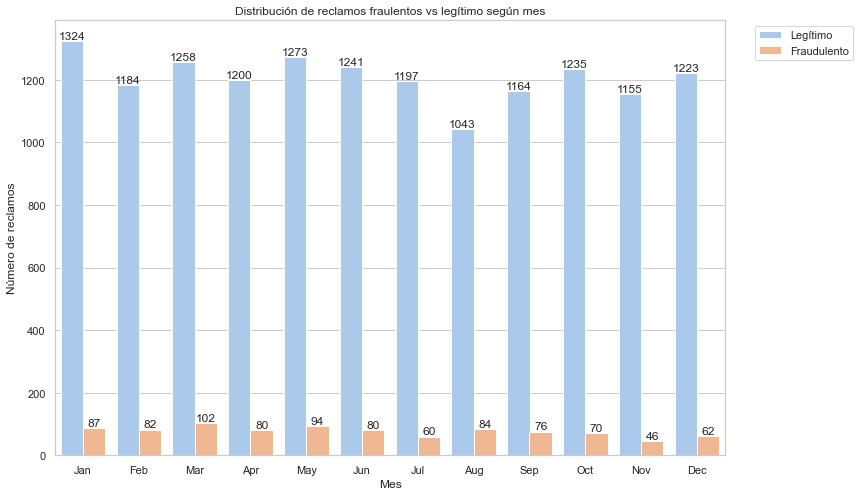

In [70]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 8))
labels = ['Legítimo', 'Fraudulento']
fig = sns.countplot(x="Month", hue ='FraudFoundP', data=df_cleaned, order= month_order,palette='pastel')
fig.bar_label(fig.containers[0], label_type='edge');

for container in fig.containers[1:]:
    fig.bar_label(container, label_type='edge')

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Distribución de reclamos fraulentos vs legítimo según mes')
plt.xlabel('Mes')
plt.ylabel('Número de reclamos')
plt.show()

Se agruparon las denuncias realizadas (legítimas y fraudulentas) por mes de los años 1994, 1995 y 1996 para poder graficar cantidad de siniestros reportados por mes. El mes con mayor cantidad de denuncias realizadas totales fue enero, y el menor es agosto, sin embargo para el mes con mayor cantidad de denuncias fraudulentas es en marzo y el menor en noviembre. 

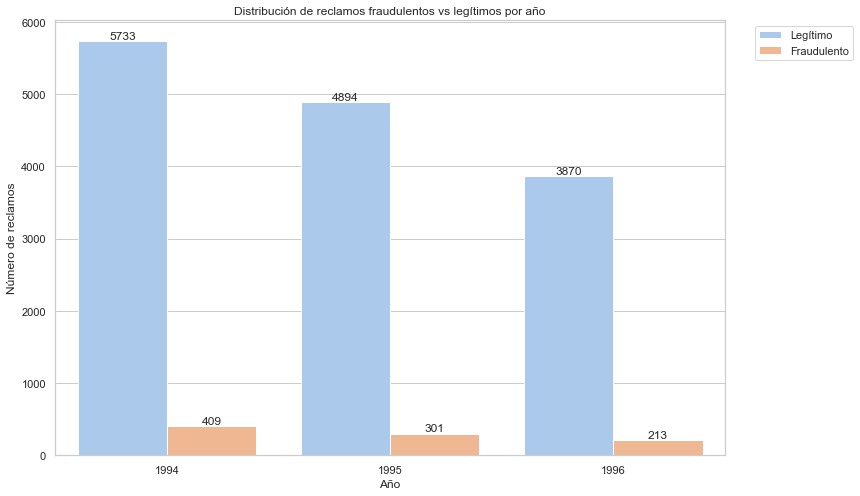

In [71]:
plt.figure(figsize=(12, 8))
labels = ['Legítimo', 'Fraudulento']
fig = sns.countplot(x="Year", hue='FraudFoundP', data=df_cleaned, palette='pastel')
fig.bar_label(fig.containers[0], label_type='edge')

for container in fig.containers[1:]:
    fig.bar_label(container, label_type='edge')

plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Distribución de reclamos fraudulentos vs legítimos por año')
plt.xlabel('Año')
plt.ylabel('Número de reclamos')
plt.show()

Este gráfico de barras muestra con más detalle la variable Year presentado en el primer gráfico de esta sección con distinción entre reclamos legítimos vs fraudulentos.

 **Género y estado marital**

Text(0.5, 1.0, 'Estado marital segmentado por sexo')

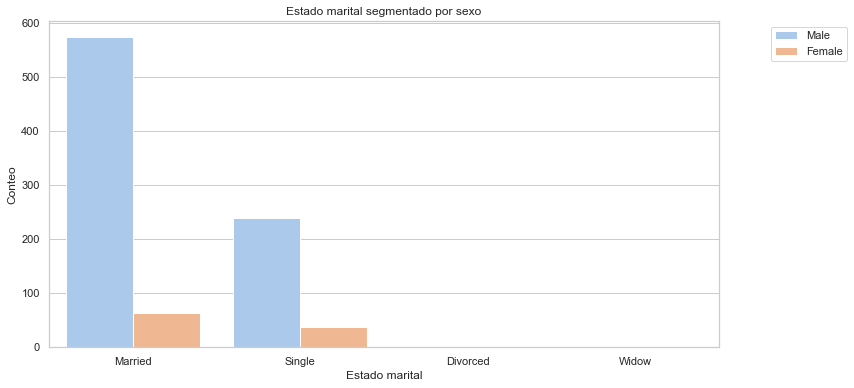

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MaritalStatus', hue='Sex', data=df_fraud_cleaned, order=df_fraud_cleaned['MaritalStatus'].value_counts(ascending=False).index,palette='pastel')
plt.xlabel('Estado marital')
plt.ylabel('Conteo')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Estado marital segmentado por sexo")

Las denuncias se realizaron primariamente por personas con estado marital de casado, seguido por soltero. No hubieron denuncias realizadas con estado marital divorciado o viudo.

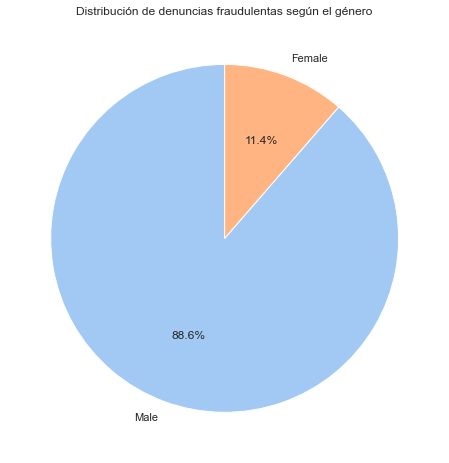

In [73]:
counts = df_fraud_cleaned['Sex'].value_counts() 
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de denuncias fraudulentas según el género')
plt.show()

De la población que cometió fraude, un 88,6% de los denunciantes fueron hombres y un 11,4% mujeres.

 **Rango etario**

Text(0.5, 1.0, 'Sexo segmentado por rango de edad del asegurado')

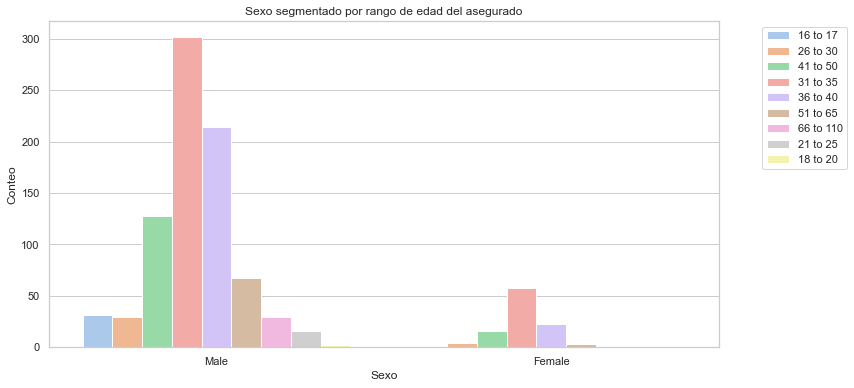

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='AgeOfPolicyHolder', data=df_fraud_cleaned,palette='pastel')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Sexo segmentado por rango de edad del asegurado")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Edad')

<Figure size 864x432 with 0 Axes>

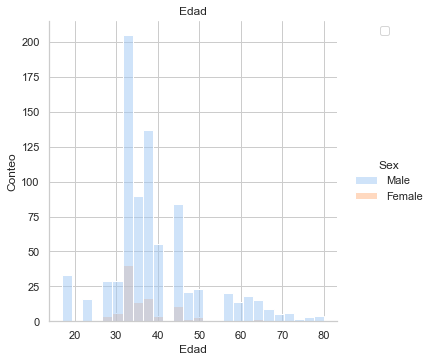

In [75]:
plt.figure(figsize=(12, 6))
sns.displot(df_fraud_cleaned,x ='Age',hue = 'Sex', palette='pastel')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Edad")

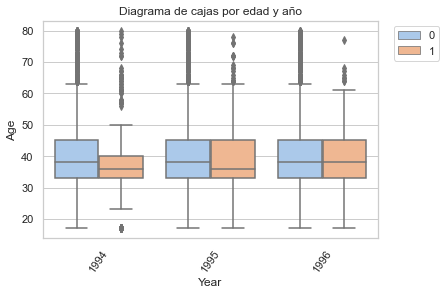

In [76]:
sns.boxplot(data= df_cleaned, x= 'Year', y='Age', hue= 'FraudFoundP',palette='pastel')
plt.xticks(rotation = 55)
plt.title("Diagrama de cajas por edad y año")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


En cuanto a la edad, se observa en el primer gráfico de la sección 6.2 que dentro de la subpoblación de denuncias fraudulentas, tanto hombres como mujeres con edades entre 31 y 35  son quienes más reportan, seguidos por quienes tienen entre 36 y 40 años. Sin embargo, se puede reducir este rango aún más, ya que el segundo gráfico de la misma sección muestra que la moda se encuentra entre los 32-34 años. 
Asimismo, el último gráfico nos revela que el rango de edades en el que se encuentra el cuartil 1, 2 y 3 no sufren de variaciones significativas para los años 1994, 1995 y 1996 en las denuncias no fradulentas. Este no es el caso para las denuncias fraudulentas ya que el tercer cuartil varia considerablemente del año 1994 a 1995 aunque la mediana ronda por el valor de los 36 años para los 3 años.

**Características más comunes de vehículos reportados en denuncias fraudulentas**

Se analizará la antiguedad, marcas y categoría.

**Antiguedad**

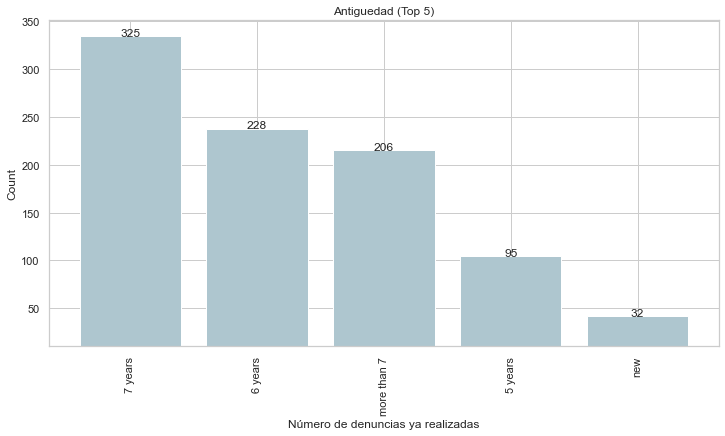

In [77]:
PastNumberOfClaims_count = df_fraud_cleaned['AgeOfVehicle']
freqs = Counter(PastNumberOfClaims_count)

top_freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True)[:5])
xvals = range(len(top_freqs.values()))

plt.figure(figsize=(12, 6))
plt.bar(xvals, top_freqs.values(), color='#AEC6CF', width=0.8, bottom=10)

for i, count in enumerate(top_freqs.values()):
    plt.text(i, count + 10, str(count), ha='center')
plt.xticks(xvals, top_freqs.keys(), rotation='vertical')
plt.xlabel('Número de denuncias ya realizadas')
plt.ylabel('Count')
plt.title("Antiguedad (Top 5)")
plt.show()



Este análisis nos confirma que en los siniestros automovilísticos fraudulentos, es más frecuente utilizar vehículos donde su antiguedad exceda los 5 años de vida. 

**Top 5 Marcas**

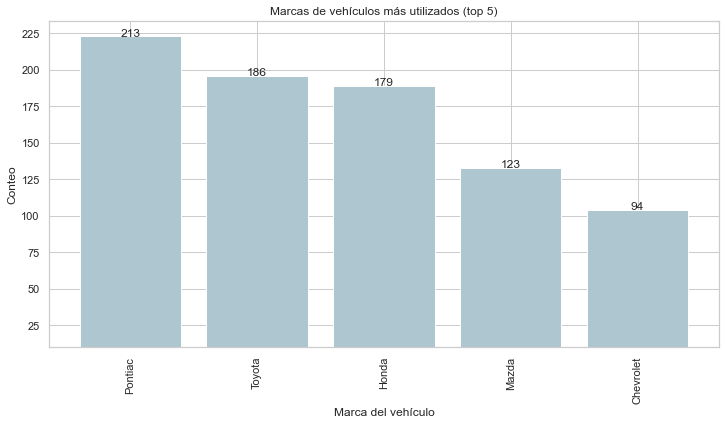

In [78]:
Make_count = df_fraud_cleaned['Make']
freqs = Counter(Make_count)
top_freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True)[:5])
xvals = range(len(top_freqs.values()))
plt.figure(figsize=(12, 6))
plt.bar(xvals, top_freqs.values() , color='#AEC6CF', width=0.8, bottom= 10)
for i, count in enumerate(top_freqs.values()):
    plt.text(i, count + 10, str(count), ha='center')
plt.xticks(xvals, top_freqs.keys(), rotation='vertical')
plt.xlabel('Marca del vehículo')
plt.ylabel('Conteo')
plt.title("Marcas de vehículos más utilizados (top 5)")
plt.show()

Las top 5 marcas reportadas en denuncias fraudulentas son: Pontiac, Toyota, Honda, Mazda, Chevrolet

**Categoría**

Text(0.5, 1.0, 'Relación entre sexo y categoría del vehiculo')

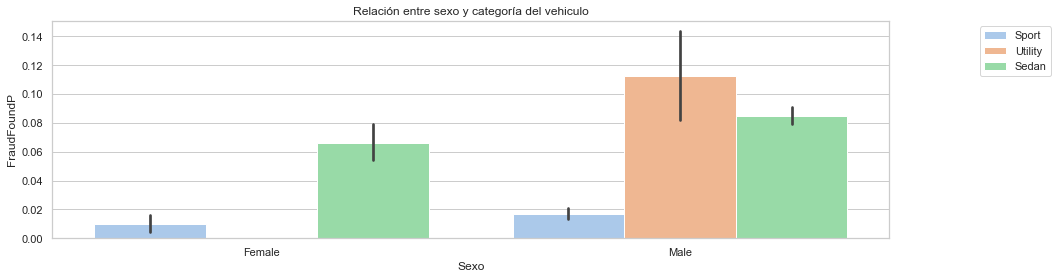

In [79]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFoundP', hue = 'VehicleCategory', data = df_cleaned,palette='pastel')
plt.xlabel('Sexo')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Relación entre sexo y categoría del vehiculo')

En cuanto a las categorías, éstas son Utility y Sedan.

# **Feature Engineering**

**Preprocesamiento**

Tratamiento de variables categóricas

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Brand = le.fit_transform(df['Make'])

df_cleaned.drop("Make", axis=1, inplace=True)
df_cleaned["Make"] = Brand

In [81]:
df_cleaned["Month"] = le.fit_transform(df_cleaned["Month"])
df_cleaned["DayOfWeek"] = le.fit_transform(df_cleaned["DayOfWeek"])
df_cleaned["DayOfWeekClaimed"] = le.fit_transform(df_cleaned["DayOfWeekClaimed"])
df_cleaned["MonthClaimed"] = le.fit_transform(df_cleaned["MonthClaimed"])
df_cleaned["PolicyType"] = le.fit_transform(df_cleaned["PolicyType"])
df_cleaned["VehiclePrice"] = le.fit_transform(df_cleaned["VehiclePrice"])
df_cleaned["DaysPolicyAccident"] = le.fit_transform(df_cleaned["DaysPolicyAccident"])
df_cleaned["PoliceReportFiled"] = le.fit_transform(df_cleaned["PoliceReportFiled"])
df_cleaned["WitnessPresent"] = le.fit_transform(df_cleaned["WitnessPresent"])
df_cleaned["AgentType"] = le.fit_transform(df_cleaned["AgentType"])
df_cleaned["NumberOfSuppliments"] = le.fit_transform(df_cleaned["NumberOfSuppliments"])
df_cleaned["AgentType"] = le.fit_transform(df_cleaned["AgentType"])
df_cleaned["PastNumberOfClaims"] = le.fit_transform(df_cleaned["PastNumberOfClaims"])
df_cleaned["AgeOfVehicle"] = le.fit_transform(df_cleaned["AgeOfVehicle"])
df_cleaned["AgeOfPolicyHolder"] = le.fit_transform(df_cleaned["AgeOfPolicyHolder"])
df_cleaned["AddressChangeClaim"] = le.fit_transform(df_cleaned["AddressChangeClaim"])
df_cleaned["NumberOfCars"] = le.fit_transform(df_cleaned["NumberOfCars"])
df_cleaned["BasePolicy"] = le.fit_transform(df_cleaned["BasePolicy"])
df_cleaned["DaysPolicyClaim"] = le.fit_transform(df_cleaned["DaysPolicyClaim"])

In [82]:
#Aplico one hot enconding para las variables que no cuenten con muchos +4 valores únicos para evitar aumentar la dimensionalidad del conjunto de datos.

pd.get_dummies(df_cleaned, columns=['Sex', 'MaritalStatus', 'AccidentArea','Fault','VehicleCategory'])
pd.get_dummies(df_cleaned, columns=['Sex', 'MaritalStatus', 'AccidentArea','Fault','VehicleCategory'], drop_first=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Sex', 'MaritalStatus', 'AccidentArea', 'Fault', 'VehicleCategory'])

**Reducción de la dimensionalidad**

Método RFECV para feature selection

In [83]:
X = df_cleaned.drop("FraudFoundP", 1)

y = df_cleaned['FraudFoundP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

C:\Users\moniq\AppData\Local\Temp/ipykernel_20988/3264589968.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_cleaned.drop("FraudFoundP", 1)


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Tuneo hiperparametros del random forest classifier que va a ser el estimador utilizado para el RFECV. Y después tuneo los hiperparametros del método RFECV.
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],  
    'random_state': [9700, 1000, 42]  
}


In [85]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


In [86]:
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [87]:
from sklearn.feature_selection import RFECV
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [88]:
param_grid = {
    'step': [1, 2, 3], 
    'cv': [1,2,3]  
}

In [89]:
rfecv = RFECV(estimator=model, scoring='accuracy')

In [90]:
grid_search = GridSearchCV(estimator=rfecv, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\moniq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moniq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\moniq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_rfe.py", line 676, in fit
    self._validate_params()
  File "c:\Users\moniq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\bas

GridSearchCV(estimator=RFECV(estimator=RandomForestClassifier(n_estimators=50,
                                                              random_state=42),
                             scoring='accuracy'),
             param_grid={'cv': [1, 2, 3], 'step': [1, 2, 3]},
             scoring='accuracy')

In [91]:
best_params = grid_search.best_params_

In [92]:
best_rfecv = RFECV(estimator=model, step=best_params['step'], cv=best_params['cv'], scoring='accuracy')

In [93]:
best_rfecv.fit(X_train, y_train)

RFECV(cv=3, estimator=RandomForestClassifier(n_estimators=50, random_state=42),
      scoring='accuracy', step=2)

In [94]:
print("The optimal number of features:", best_rfecv.n_features_)
print("Best features:", X_train.columns[best_rfecv.support_])

The optimal number of features: 26
Best features: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Age', 'PolicyType', 'VehiclePrice',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChangeClaim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Make', 'Sex_Male', 'AccidentArea_Rural',
       'Fault_Policy Holder', 'Fault_Third Party'],
      dtype='object')


In [95]:
#Remuevo variables no revelantes.
columns_to_keep = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Age', 'PolicyType', 'VehiclePrice',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChangeClaim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Make', 'Sex_Male', 'AccidentArea_Rural',
       'Fault_Policy Holder', 'Fault_Third Party']
df_cleaned = df_cleaned.copy().drop(df_cleaned.columns.difference(columns_to_keep), axis=1)


**Selección de modelos de clasificación y entrenamiento con optimización de hiperparámetros**

Decision Tree Classifier

In [96]:
dtc = DecisionTreeClassifier(max_depth=4)

param_grid = {
    'max_depth': [3, 4, 5, None],  
    'criterion': ['gini', 'entropy'], 
}
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, None]},
             scoring='accuracy')

In [97]:
best_params = grid_search.best_params_
best_dtc = DecisionTreeClassifier(**best_params)

best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [98]:
y_train_pred = best_dtc.predict(X_train)
y_test_pred = best_dtc.predict(X_test)

In [99]:
dtc_accuracy_test= metrics.accuracy_score(y_test,y_test_pred)
dtc_accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
dtc_precision= precision_score(y_test, y_test_pred) 
dtc_recall=recall_score(y_test, y_test_pred) 
dtc_F1=f1_score(y_test, y_test_pred) 

print(dtc_accuracy_test)
print(dtc_accuracy_train)
print(dtc_precision)
print(dtc_recall)
print(dtc_F1)

0.935473411154345
0.9445525291828794
0.8
0.03902439024390244
0.07441860465116279


Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.01, 0.001], 
    'max_depth': [1, 2, 3],  
   
}
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)




GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                  max_depth=1, random_state=0),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [101]:
best_params = grid_search.best_params_
best_gbc = GradientBoostingClassifier(**best_params)

In [102]:
best_gbc.fit(X_train, y_train)


y_train_pred = best_gbc.predict(X_train)
y_test_pred = best_gbc.predict(X_test)

In [103]:
gbc_accuracy_test= metrics.accuracy_score(y_test,y_test_pred)
gbc_accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
gbc_precision= precision_score(y_test, y_test_pred) 
gbc_recall=recall_score(y_test, y_test_pred) 
gbc_F1=f1_score(y_test, y_test_pred) 

print(gbc_accuracy_test)
print(gbc_accuracy_train)
print(gbc_precision)
print(gbc_recall)
print(gbc_F1)

0.937094682230869
0.9508754863813229
0.8666666666666667
0.06341463414634146
0.11818181818181818


AdaBoost Classifier

In [104]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],  
}

grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_abc = AdaBoostClassifier(**best_params)

best_abc.fit(X_train, y_train)

y_train_pred = best_abc.predict(X_train)
y_test_pred = best_abc.predict(X_test)

In [105]:
abc_accuracy_test= metrics.accuracy_score(y_test,y_test_pred)
abc_accuracy_train= metrics.accuracy_score(y_train,y_train_pred)
abc_precision= precision_score(y_test, y_test_pred) 
abc_recall=recall_score(y_test, y_test_pred) 
abc_F1=f1_score(y_test, y_test_pred) 

print(abc_accuracy_test)
print(abc_accuracy_train)
print(abc_precision)
print(abc_recall)
print(abc_F1)

0.9296368352788587
0.9379863813229572
0.2692307692307692
0.03414634146341464
0.060606060606060615


Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_rfc = RandomForestClassifier(**best_params)


best_rfc.fit(X_train, y_train)


RandomForestClassifier()

In [107]:
y_train_pred = best_abc.predict(X_train)
y_test_pred = best_abc.predict(X_test)

In [108]:
rfc_accuracy_test= metrics.accuracy_score(y_test,y_test_pred)
rfc_accuracy_train= metrics.accuracy_score(y_train,y_train_pred)
rfc_precision= precision_score(y_test, y_test_pred) 
rfc_recall=recall_score(y_test, y_test_pred) 
rfc_F1=f1_score(y_test, y_test_pred) 

print(rfc_accuracy_test)
print(rfc_accuracy_train)
print(rfc_precision)
print(rfc_recall)
print(rfc_F1)

0.9296368352788587
0.9379863813229572
0.2692307692307692
0.03414634146341464
0.060606060606060615


Comparación de modelos

In [109]:
comparacion_accuracy = pd.DataFrame({'Modelo': ['Decision Tree Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier','Random Forest Classifier'], 
                            'Accuracy train': [dtc_accuracy_train,gbc_accuracy_train,abc_accuracy_train,rfc_accuracy_train], 
                            'Accuracy test': [dtc_accuracy_test,gbc_accuracy_test,abc_accuracy_test,rfc_accuracy_test]})

comparacion_accuracy

,Modelo,Accuracy train,Accuracy test
0,Decision Tree Classifier,0.944553,0.935473
1,Gradient Boosting Classifier,0.950875,0.937095
2,AdaBoost Classifier,0.937986,0.929637
3,Random Forest Classifier,0.937986,0.929637


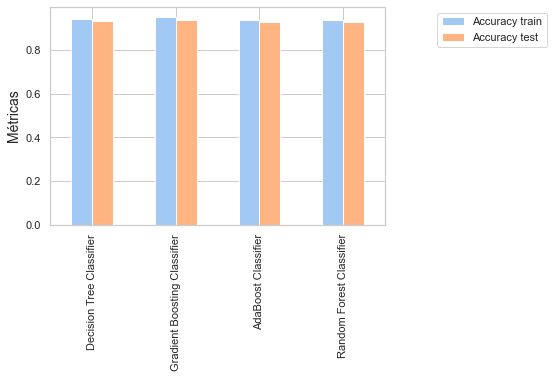

In [118]:
sns.set_palette('pastel')

comparacion_accuracy.plot(x='Modelo', kind='bar')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Métricas', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))


plt.show()

In [112]:
comparacion_precision_recall_f1 = pd.DataFrame({'Modelo': ['Decision Tree Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier','Random Forest Classifier'], 
                            'Precision': [dtc_precision,gbc_precision,abc_precision,rfc_precision], 
                            'Recall': [dtc_recall,gbc_recall,abc_recall,rfc_recall],
                            'F1 Score': [dtc_F1,gbc_F1,abc_F1,rfc_F1]})

comparacion_precision_recall_f1

,Modelo,Precision,Recall,F1 Score
0,Decision Tree Classifier,0.800000,0.039024,0.074419
1,Gradient Boosting Classifier,0.866667,0.063415,0.118182
2,AdaBoost Classifier,0.269231,0.034146,0.060606
3,Random Forest Classifier,0.269231,0.034146,0.060606


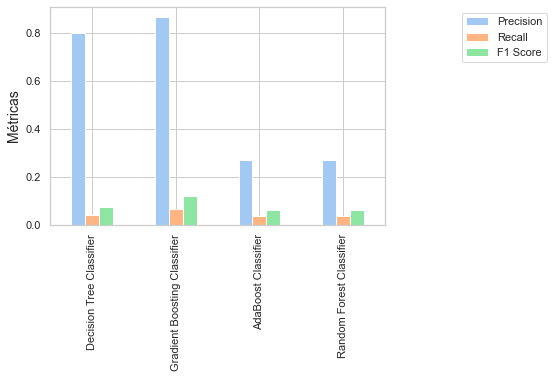

In [119]:
sns.set_palette('pastel')
comparacion_precision_recall_f1.plot(x = 'Modelo', kind = 'bar')

plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Métricas', fontsize = 14)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()




# **Conclusión**

En conclusión, elegimos el modelo de ensamble Gradient Boosting Classifier para predecir casos de fraude en seguros automovilísticos con aplicación previa del método RFECV para feature selection y el método GridSearchCV para tunear hiperparametros. 
Este es el método que tuvo mejor accurac contando con 95,08% para train y 93,70% para test y el que mejor performance tuvo en relación a las métricas de precision, recall y F1 score en comparación con los otros métodos evaluados (Decision Tree Classifier, AdaBoost Classifier y Random Forest Classifier).